## Solid Waste Management Preprocessing ML Model

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [9]:
X_train=pd.read_pickle("./X_train.pkl")
X_test=pd.read_pickle("./X_test.pkl")
y_train=pd.read_pickle("./y_train.pkl")
y_test=pd.read_pickle("./y_test.pkl")

X=pd.read_pickle("./X.pkl")
y=pd.read_pickle("./y.pkl")

## Standard Scale

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [11]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [12]:
std  = np.sqrt(sc.var_)
np.save('std.npy',std )
np.save('mean.npy',sc.mean_)

## Models

### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score

In [14]:
M1=RandomForestClassifier()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print('classification Report:',classification_report(y_test,P1))
print('\n')
print('Confusion Matrix:', confusion_matrix(y_test,P1))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P1))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M1.predict_proba(X_test),multi_class='ovr'))

classification Report:               precision    recall  f1-score   support

           0       0.50      0.50      0.50        36
           1       0.33      0.24      0.28        38
           2       0.29      0.50      0.37        22
           3       0.22      0.17      0.20        23

    accuracy                           0.35       119
   macro avg       0.34      0.35      0.33       119
weighted avg       0.35      0.35      0.35       119



Confusion Matrix: [[18  9  4  5]
 [10  9 14  5]
 [ 4  3 11  4]
 [ 4  6  9  4]]


ACCURACY: 0.35294117647058826


Roc Value: 0.6556081753853147


### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
M2=DecisionTreeClassifier()
M2.fit(X_train,y_train)
P2=M2.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P2))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P2))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P2))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M2.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.50      0.51        36
           1       0.32      0.26      0.29        38
           2       0.29      0.32      0.30        22
           3       0.17      0.22      0.19        23

    accuracy                           0.34       119
   macro avg       0.33      0.32      0.32       119
weighted avg       0.35      0.34      0.34       119



Confusion Matrix: 
 [[18 10  2  6]
 [11 10  9  8]
 [ 2  3  7 10]
 [ 4  8  6  5]]


ACCURACY: 0.33613445378151263


Roc Value: 0.5531666574395244


### Knn

In [17]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

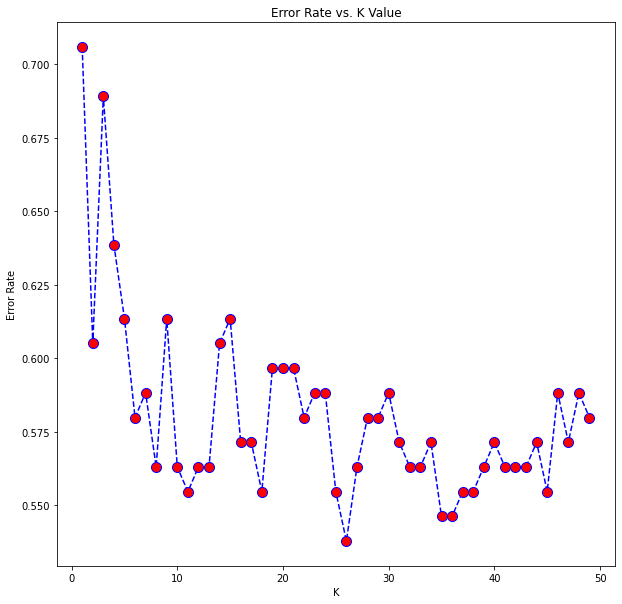

In [18]:
error_Mat=[]
for i in range (1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))
plt.figure(figsize=(10,10))
plt.plot(range(1,50),error_Mat,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [19]:
M3=KNeighborsClassifier(n_neighbors=10)
M3.fit(X_train,y_train)
P3=M3.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P3))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P3))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P3))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M3.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.61      0.54        36
           1       0.40      0.37      0.38        38
           2       0.38      0.55      0.44        22
           3       0.57      0.17      0.27        23

    accuracy                           0.44       119
   macro avg       0.46      0.42      0.41       119
weighted avg       0.46      0.44      0.42       119



Confusion Matrix: 
 [[22 12  2  0]
 [11 14 10  3]
 [ 6  4 12  0]
 [ 6  5  8  4]]


ACCURACY: 0.4369747899159664


Roc Value: 0.6491766273476975


### NB

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
M4=GaussianNB()
M4.fit(X_train,y_train)
P4=M4.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P4))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P4))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P4))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M4.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.34      0.94      0.50        36
           1       0.80      0.11      0.19        38
           2       0.58      0.32      0.41        22
           3       0.33      0.04      0.08        23

    accuracy                           0.39       119
   macro avg       0.52      0.35      0.29       119
weighted avg       0.53      0.39      0.30       119



Confusion Matrix: 
 [[34  1  0  1]
 [30  4  3  1]
 [15  0  7  0]
 [20  0  2  1]]


ACCURACY: 0.3865546218487395


Roc Value: 0.652944376718457


### GB Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

In [23]:

M5=GradientBoostingClassifier()
M5.fit(X_train,y_train)
P5=M5.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P5))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P5))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P5))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M5.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.53      0.56        36
           1       0.38      0.29      0.33        38
           2       0.35      0.55      0.43        22
           3       0.33      0.35      0.34        23

    accuracy                           0.42       119
   macro avg       0.41      0.43      0.41       119
weighted avg       0.43      0.42      0.42       119



Confusion Matrix: 
 [[19 10  2  5]
 [ 8 11 13  6]
 [ 2  3 12  5]
 [ 3  5  7  8]]


ACCURACY: 0.42016806722689076


Roc Value: 0.670145158933635


### Hist Boosing

In [24]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [25]:
M6=HistGradientBoostingClassifier()
M6.fit(X_train,y_train)
P6=M6.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P6))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P6))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P6))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M6.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.42      0.48        36
           1       0.33      0.29      0.31        38
           2       0.35      0.55      0.43        22
           3       0.36      0.39      0.37        23

    accuracy                           0.39       119
   macro avg       0.40      0.41      0.40       119
weighted avg       0.41      0.39      0.39       119



Confusion Matrix: 
 [[15 11  4  6]
 [ 9 11 12  6]
 [ 0  6 12  4]
 [ 3  5  6  9]]


ACCURACY: 0.3949579831932773


Roc Value: 0.6536328509512317


### Neural Network

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
M7=MLPClassifier(hidden_layer_sizes=(50,))
M7.fit(X_train,y_train)
P7=M7.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P7))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P7))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P7))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M7.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.47      0.49        36
           1       0.44      0.37      0.40        38
           2       0.39      0.59      0.47        22
           3       0.38      0.35      0.36        23

    accuracy                           0.44       119
   macro avg       0.43      0.44      0.43       119
weighted avg       0.44      0.44      0.43       119



Confusion Matrix: 
 [[17 11  4  4]
 [ 7 14 10  7]
 [ 5  2 13  2]
 [ 4  5  6  8]]


ACCURACY: 0.4369747899159664


Roc Value: 0.6807105978346899


### XG Boost

In [28]:
from xgboost import XGBClassifier

In [29]:
M8=XGBClassifier()
M8.fit(X_train,y_train)
P8=M8.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P8))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P8))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P8))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M8.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.47      0.48        36
           1       0.33      0.26      0.29        38
           2       0.38      0.55      0.44        22
           3       0.27      0.26      0.27        23

    accuracy                           0.38       119
   macro avg       0.37      0.39      0.37       119
weighted avg       0.38      0.38      0.37       119



Confusion Matrix: 
 [[17 11  2  6]
 [11 10 10  7]
 [ 1  6 12  3]
 [ 6  3  8  6]]


ACCURACY: 0.37815126050420167


Roc Value: 0.6451199467742761


### Cat Boost

In [30]:
from catboost import CatBoostClassifier

In [31]:
M9=CatBoostClassifier(verbose=0)
M9.fit(X_train,y_train)
P9=M9.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P9))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P9))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P9))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M9.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.47      0.52        36
           1       0.33      0.29      0.31        38
           2       0.32      0.55      0.41        22
           3       0.42      0.35      0.38        23

    accuracy                           0.40       119
   macro avg       0.41      0.41      0.40       119
weighted avg       0.42      0.40      0.40       119



Confusion Matrix: 
 [[17 12  3  4]
 [ 8 11 15  4]
 [ 1  6 12  3]
 [ 4  4  7  8]]


ACCURACY: 0.40336134453781514


Roc Value: 0.6627827300031557


### Light GBM

In [32]:
from lightgbm import LGBMClassifier

In [33]:
M10=LGBMClassifier()
M10.fit(X_train,y_train)
P10=M10.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P10))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P10))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P10))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M10.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.42      0.46        36
           1       0.38      0.29      0.33        38
           2       0.34      0.55      0.42        22
           3       0.31      0.35      0.33        23

    accuracy                           0.39       119
   macro avg       0.39      0.40      0.38       119
weighted avg       0.40      0.39      0.39       119



Confusion Matrix: 
 [[15 10  4  7]
 [ 9 11 12  6]
 [ 2  3 12  5]
 [ 3  5  7  8]]


ACCURACY: 0.3865546218487395


Roc Value: 0.6576443949135657


### Bagging

In [34]:
from sklearn.ensemble import BaggingClassifier

In [35]:
M11=BaggingClassifier(base_estimator=LGBMClassifier())
M11.fit(X_train,y_train)
P11=M11.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P11))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P11))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P11))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M11.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.47      0.52        36
           1       0.35      0.24      0.28        38
           2       0.28      0.50      0.35        22
           3       0.33      0.35      0.34        23

    accuracy                           0.38       119
   macro avg       0.39      0.39      0.37       119
weighted avg       0.40      0.38      0.38       119



Confusion Matrix: 
 [[17 10  3  6]
 [ 8  9 17  4]
 [ 2  3 11  6]
 [ 2  4  9  8]]


ACCURACY: 0.37815126050420167


Roc Value: 0.6850216132728312


## ALL at one place

In [36]:

Name=['Random Forest Classifier','Decision Tree','Naive Bayes classifier', 'KNN', 
      'GBBoosting','Histogram Boosting Classifier','XGB Boosting','Light GBM',
      'CAT Boosting','Neural_Network','Bagging_classifier']
clfs= [RandomForestClassifier(),DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier(n_neighbors=3),
      GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1),
       HistGradientBoostingClassifier(),XGBClassifier(),LGBMClassifier(),MLPClassifier(),
       CatBoostClassifier(verbose=0),BaggingClassifier(base_estimator=LGBMClassifier())]

In [37]:
results=[]

for i in clfs:
    i.fit(X_train,y_train)
    score=roc_auc_score(y_test,i.predict_proba(X_test),multi_class='ovr')
    results.append(score)
    
Score=pd.DataFrame(data=results,index=Name)
Score.columns=['Accuracy']

Score.sort_values(by='Accuracy',ascending=False)

,Accuracy
Bagging_classifier,0.683353
GBBoosting,0.672948
Neural_Network,0.662783
Light GBM,0.657644
Histogram Boosting Classifier,0.653633
Naive Bayes classifier,0.652944
CAT Boosting,0.652474
XGB Boosting,0.645120
Random Forest Classifier,0.639272
KNN,0.600938


## Feature Selection

In [38]:
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=5,shuffle=False, random_state=None)

In [39]:
from sklearn.feature_selection import SelectFromModel, RFECV
model = CatBoostClassifier()

M37 = RFECV(estimator=model, step=1, cv=kfold, scoring='accuracy', n_jobs=2)

M37 = M37.fit(X_train, y_train)

print('Optimal number of features :', M37.n_features_)

print('Best features :', X.columns[M37.support_])

Learning rate set to 0.073588
0:	learn: 1.3681590	total: 1.55ms	remaining: 1.55s
1:	learn: 1.3523754	total: 2.6ms	remaining: 1.3s
2:	learn: 1.3351327	total: 4.15ms	remaining: 1.38s
3:	learn: 1.3192095	total: 5.65ms	remaining: 1.41s
4:	learn: 1.3016639	total: 7.53ms	remaining: 1.5s
5:	learn: 1.2871080	total: 9.19ms	remaining: 1.52s
6:	learn: 1.2744359	total: 10.5ms	remaining: 1.49s
7:	learn: 1.2627524	total: 12.3ms	remaining: 1.52s
8:	learn: 1.2495716	total: 14.3ms	remaining: 1.58s
9:	learn: 1.2373894	total: 15.9ms	remaining: 1.57s
10:	learn: 1.2253157	total: 17.1ms	remaining: 1.54s
11:	learn: 1.2126751	total: 18.6ms	remaining: 1.53s
12:	learn: 1.2026253	total: 20ms	remaining: 1.52s
13:	learn: 1.1993585	total: 20.8ms	remaining: 1.47s
14:	learn: 1.1903131	total: 22.2ms	remaining: 1.46s
15:	learn: 1.1816089	total: 23.5ms	remaining: 1.44s
16:	learn: 1.1733811	total: 24.8ms	remaining: 1.44s
17:	learn: 1.1652513	total: 26.3ms	remaining: 1.44s
18:	learn: 1.1573558	total: 28ms	remaining: 1.45s

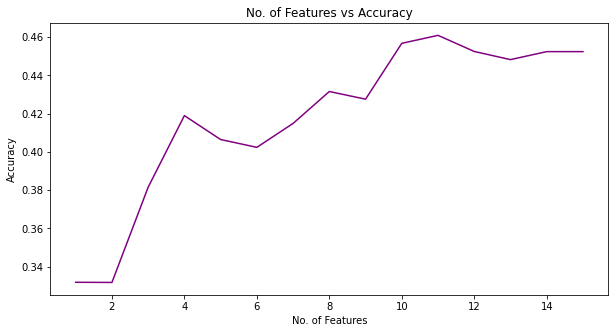

In [40]:
plt.figure(figsize=(10,5))
plt.plot(range(1, len(M37.grid_scores_)+1), np.mean(M37.grid_scores_, axis=1), color='purple')
plt.xlabel("No. of Features")
plt.ylabel("Accuracy")
plt.title("No. of Features vs Accuracy")
plt.show()

In [41]:
import pickle
filename = 'final_model.pkl'
pickle.dump(M9, open(filename, 'wb'))